In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt



In [23]:
df = pd.read_csv("Resources\great_lakes.csv")
df.head()

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,state,sqfeet_binned
0,bloomington-normal,850,apartment,1100,2,1.0,1,1,1,0,0,0,w/d hookups,street parking,40.4785,-88.9503,il,1000 - 2000
1,bloomington-normal,625,apartment,900,2,1.0,1,1,1,0,0,0,laundry on site,off-street parking,40.4783,-88.9489,il,500 - 1000
2,chicago,2910,apartment,1500,3,2.0,1,1,0,0,0,0,w/d in unit,street parking,41.8962,-87.6685,il,1000 - 2000
3,chicago,2085,loft,662,0,1.0,1,1,0,1,0,0,w/d in unit,attached garage,41.8971,-87.6223,il,500 - 1000
4,chicago,840,apartment,700,1,1.0,1,1,0,0,0,0,laundry in bldg,off-street parking,41.9268,-88.0687,il,500 - 1000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52049 entries, 0 to 52048
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   region                   52049 non-null  object 
 1   price                    52049 non-null  int64  
 2   type                     52049 non-null  object 
 3   sqfeet                   52049 non-null  int64  
 4   beds                     52049 non-null  int64  
 5   baths                    52049 non-null  float64
 6   cats_allowed             52049 non-null  int64  
 7   dogs_allowed             52049 non-null  int64  
 8   smoking_allowed          52049 non-null  int64  
 9   wheelchair_access        52049 non-null  int64  
 10  electric_vehicle_charge  52049 non-null  int64  
 11  comes_furnished          52049 non-null  int64  
 12  laundry_options          52049 non-null  object 
 13  parking_options          52049 non-null  object 
 14  lat                   

In [24]:
df=df.drop(["state"],axis=1)
df=df.drop(["sqfeet_binned"],axis=1)

In [25]:
df['laundry_options'] = df['laundry_options'].fillna(df['laundry_options'].mode()[0])
df['parking_options'] = df['parking_options'].fillna(df['parking_options'].mode()[0])
df['lat'] = df['lat'].fillna(df['lat'].mean())
df['long'] = df['long'].fillna(df['long'].mean())

In [26]:
df["baths"]=df["baths"].astype("int")

In [27]:
outlier1 = ((df["beds"]>4) | (df["baths"]>4))
print("There is {} outlier".format(df[outlier1]["beds"].count()))

There is 184 outlier


In [28]:
df = df[~outlier1]

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'sqfeet'}>,
        <AxesSubplot:title={'center':'beds'}>],
       [<AxesSubplot:title={'center':'baths'}>,
        <AxesSubplot:title={'center':'cats_allowed'}>,
        <AxesSubplot:title={'center':'dogs_allowed'}>],
       [<AxesSubplot:title={'center':'smoking_allowed'}>,
        <AxesSubplot:title={'center':'wheelchair_access'}>,
        <AxesSubplot:title={'center':'electric_vehicle_charge'}>],
       [<AxesSubplot:title={'center':'comes_furnished'}>,
        <AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>]], dtype=object)

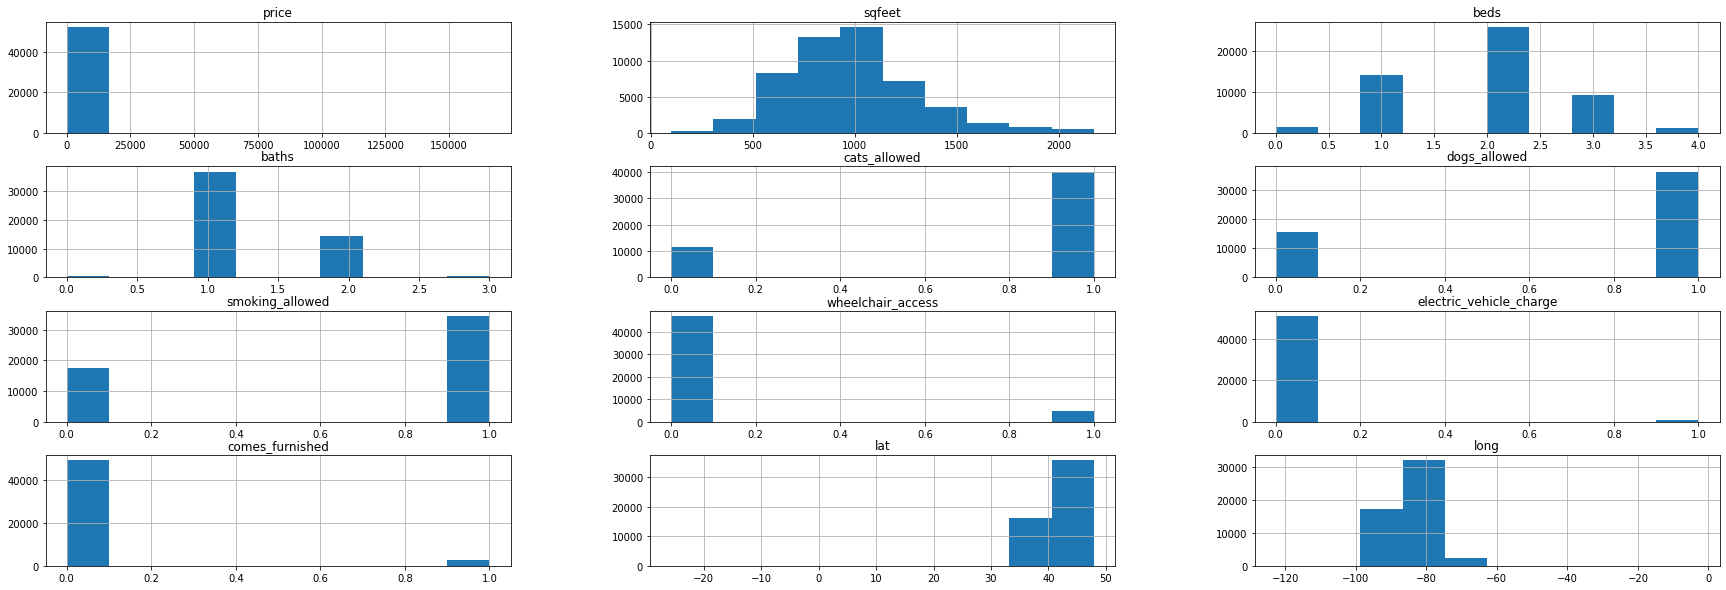

In [29]:
df.hist(figsize=(30,10))

In [30]:
outlier2 = ((df["sqfeet"]<120) | (df["sqfeet"]>5000) | (df["price"]<100) | (df["price"]>10000))
print("There is {} outlier".format(df[outlier2]["cats_allowed"].count()))

There is 322 outlier


In [31]:
df = df[~outlier2]

In [32]:
df.describe()

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,51543.000000,51543.000000,51543.000000,51543.000000,51543.000000,51543.000000,51543.000000,51543.000000,51543.000000,51543.000000,51543.000000,51543.000000
mean,1082.018334,985.191394,1.901888,1.288633,0.775062,0.698756,0.665716,0.090953,0.015288,0.050560,41.826217,-84.326129
std,472.918397,315.496652,0.810337,0.488052,0.417546,0.458803,0.471744,0.287545,0.122698,0.219099,1.970616,5.644146
min,100.000000,120.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-25.661800,-122.730000
25%,785.000000,761.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.263300,-88.231750
50%,956.000000,950.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,41.993100,-84.476400
75%,1271.000000,1150.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,43.037200,-80.765350
max,9790.000000,2172.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,47.927200,-2.831000


In [33]:
df=df.drop(["cats_allowed"],axis=1)
df.rename(columns = {'dogs_allowed':'pets_allowed'}, inplace = True)

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
le=LabelEncoder()
db=df

In [36]:
db["region"]=le.fit_transform(df["region"])
db["type"]=le.fit_transform(df["type"])
db["laundry_options"]=le.fit_transform(df["laundry_options"])
db["parking_options"]=le.fit_transform(df["parking_options"])

In [37]:
x=db.drop(columns=["price"])
y=db["price"]

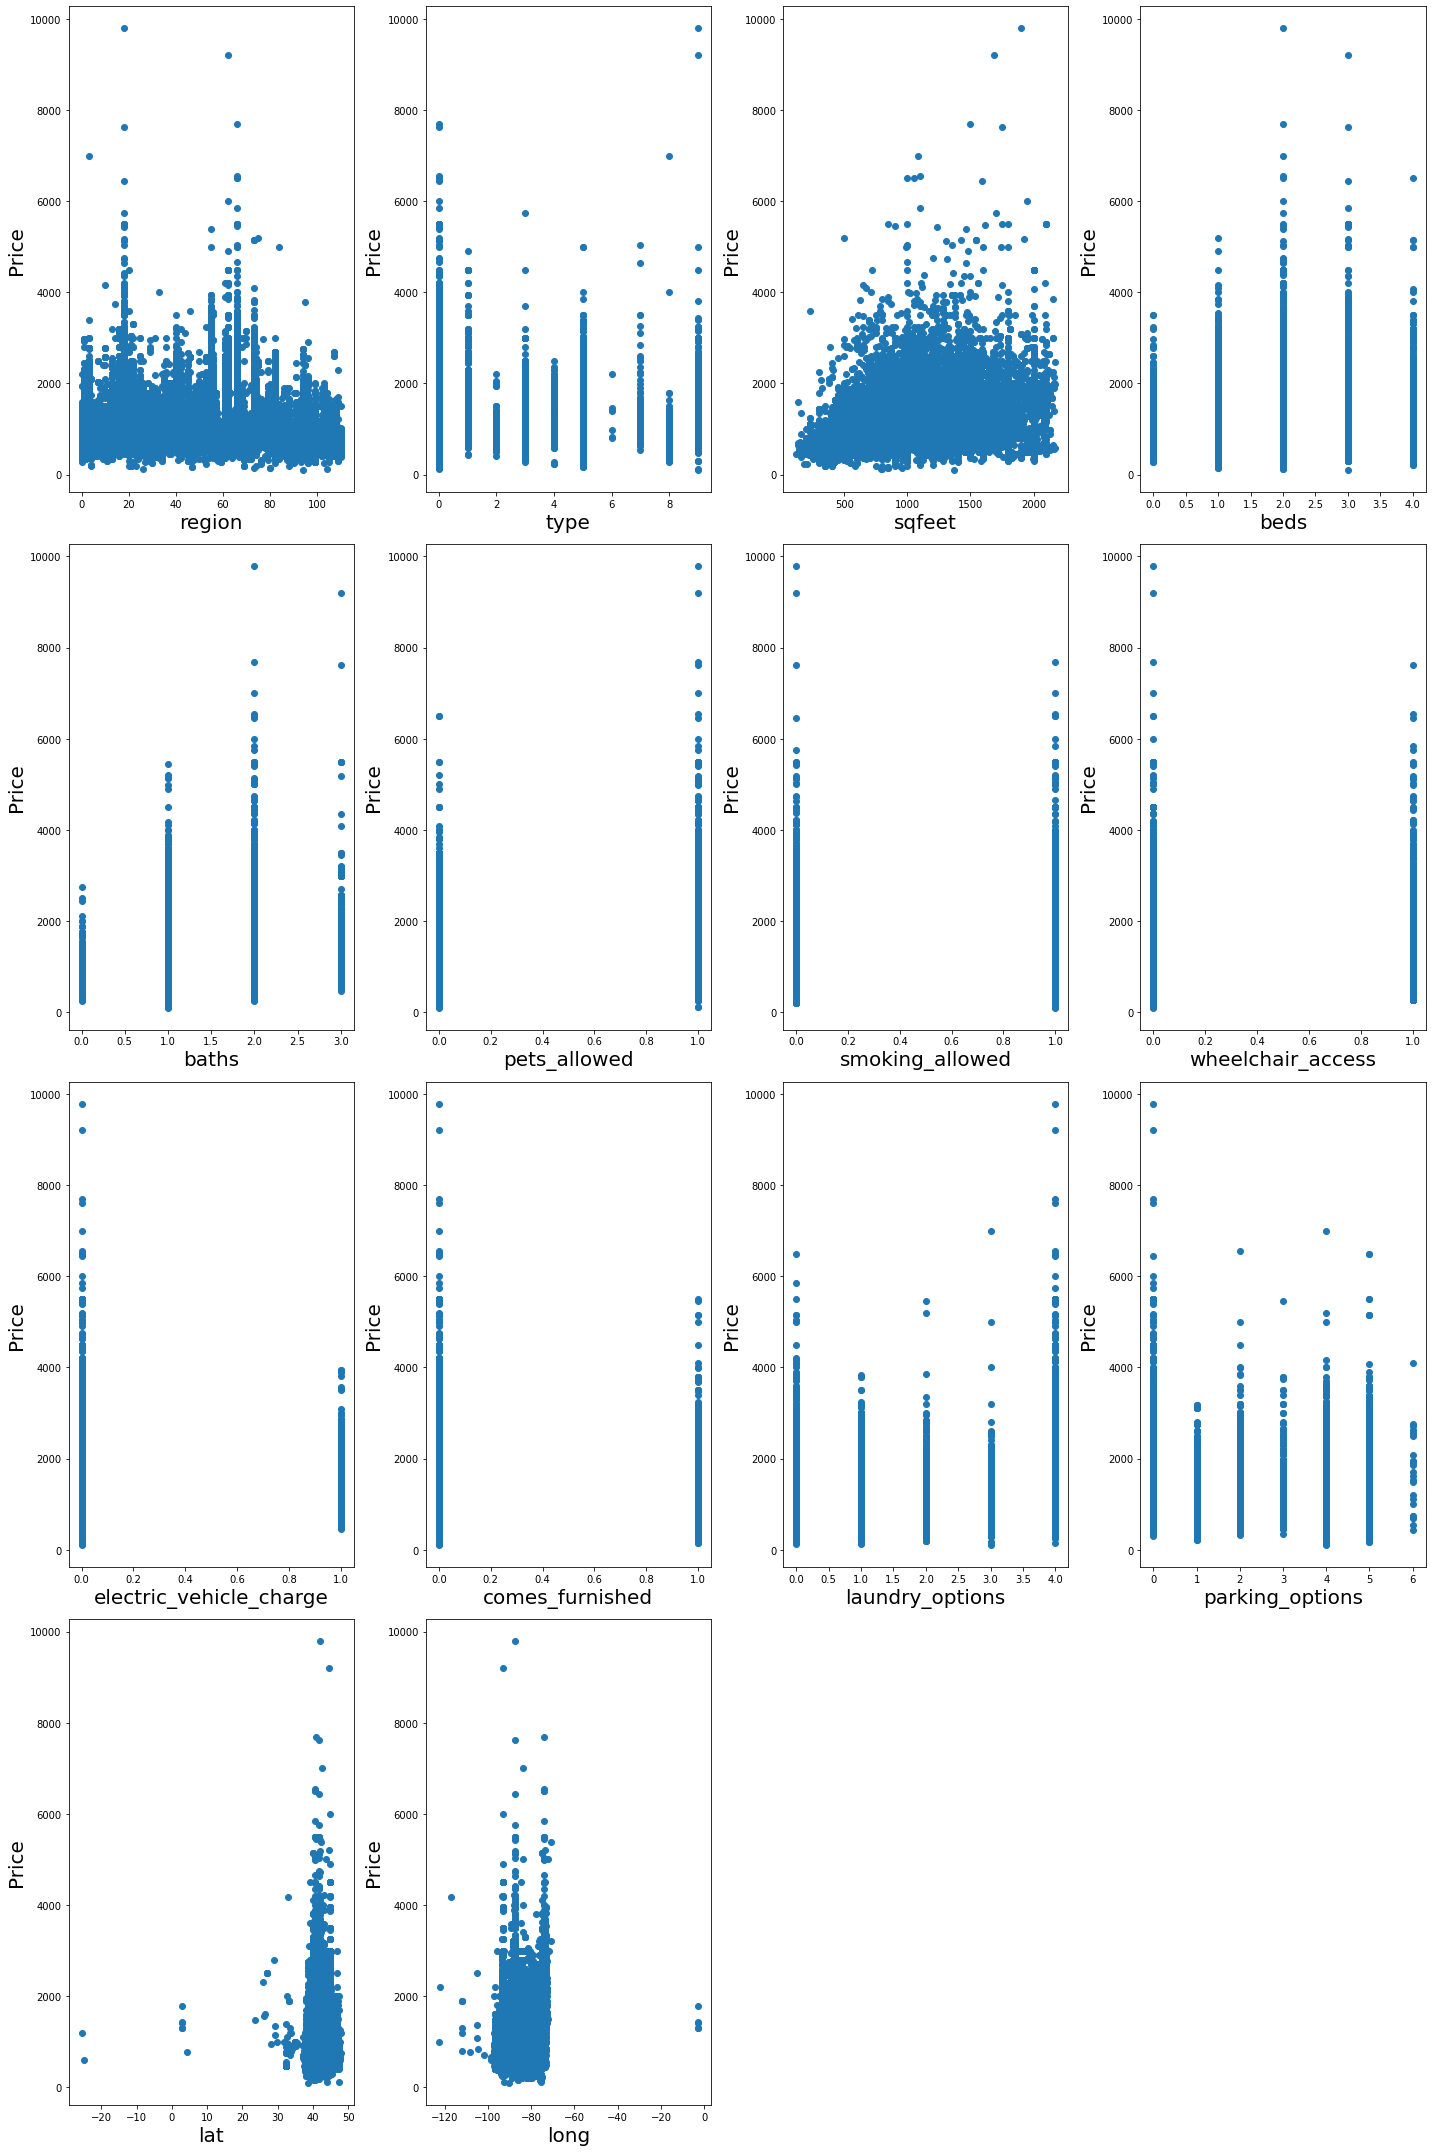

In [38]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in x:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Price',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [39]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.30,random_state=470)

In [42]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [43]:
dtr = DecisionTreeRegressor()
ran = RandomForestRegressor(n_estimators=90)
lin = LinearRegression()

In [44]:
models = {"Decision tree" : dtr,
          "Random forest" : ran,
          "Linear Regression" : lin}
scores= { }

In [45]:
for key, value in models.items():    
    model = value
    model.fit(x_train, y_train)
    scores[key] = model.score(x_test, y_test)

In [46]:
scores_frame = pd.DataFrame(scores, index=["Accuracy Score"]).T
scores_frame.sort_values(by=["Accuracy Score"], axis=0 ,ascending=False, inplace=True)
scores_frame

,Accuracy Score
Random forest,0.829271
Decision tree,0.680515
Linear Regression,0.303892


In [47]:
y_pred=ran.predict(x_test)

In [48]:
from sklearn import metrics
print('R^2:',metrics.r2_score(y_test, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_pred))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.8292705372709361
Adjusted R^2: 0.8292042621432998
MAE: 84.33233955223226
MSE: 38378.08466946441
RMSE: 195.9032533406845
